# Loan Data Exploration 
## by Ahmed Mahmoud

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.shape

(113937, 81)

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, the good news is that most variables are numeric the bad news is some Nan values and redudency in this large number of features.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested here in features afficting the outcome of the loan and the borrower's APR and interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I tried to understand the mean of every single variable in the 81 using dictionary file and google searching almost was leading to www.investopedia.com and www.prosper.com; in the next step I'll try to reduce these variable according to:
- Its relativity to the target question
- Its quality in this dataset 

In [6]:
d= ['ListingNumber', 'ListingCreationDate', 'ClosedDate', 'LenderYield',
              'BorrowerState', 'Occupation',
              'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',
              'CurrentCreditLines', 'TotalCreditLinespast7years', 'InquiriesLast6Months',
              'TotalInquiries', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 
              'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'BankcardUtilization',
              'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
              'TradesOpenedLast6Months', 'LoanKey', 'ProsperPaymentsLessThanOneMonthLate',
              'ProsperPaymentsOneMonthPlusLate', 'ScorexChangeAtTimeOfListing', 
              'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
              'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 'MemberKey',
              'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss',
              'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount']
df.drop(d, inplace=True, axis=1, errors='ignore')
df.shape

(113937, 43)

## Univariate Exploration

> Looking at the distribution of variables of interests.

### 1. Loan Status :

In [7]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

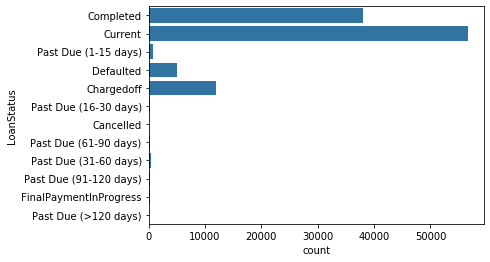

In [8]:
base_color= sb.color_palette()[0]
sb.countplot(data=df, y='LoanStatus', color= base_color)

#### Observations :
Most (more than 50,000) loans in this dataset are currently active and completed and rarely cancelled and considerable amount are Defaulted and Charged off.


### 2. Borrower APR

In [9]:
df['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

C:\Users\WinDows10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\WinDows10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


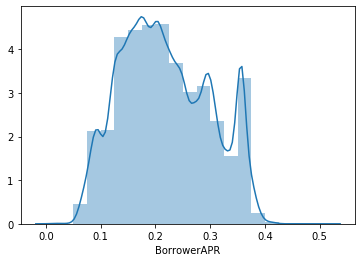

In [10]:
bins_APR = np.arange(0, .5+.025, .025)
sb.distplot(df['BorrowerAPR'], bins= bins_APR);
plt.xlabel('BorrowerAPR');

#### Observation :
distribution of APRs (annual percentage rate) almost skewed to the left with the mean 0.2 and maximum value 0.5

### 3. Borrower's interest rate

In [11]:
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

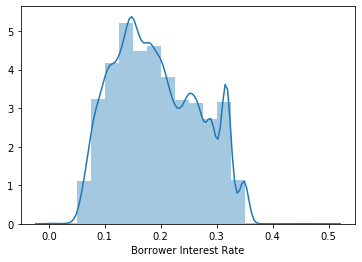

In [12]:
bins_Rate = np.arange(0, .5+.025, .025)
sb.distplot(df['BorrowerRate'], bins= bins_Rate);
plt.xlabel('Borrower Interest Rate');

#### Observations :
almost the same distribution of the APR slightly skewed to the left with mean 0.2 

### 4. Loan original amount:

In [13]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

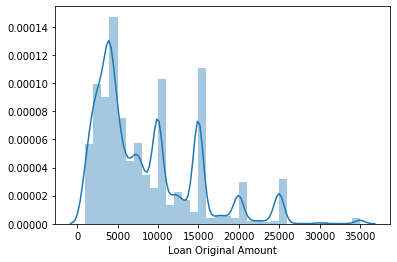

In [14]:
bins_Amount = np.arange(0, 35000+1000, 1000)
sb.distplot(df['LoanOriginalAmount'], bins= bins_Amount);
plt.xlabel('Loan Original Amount');

### Observations:
Loan amounts heavily skewed to the left with several spikes on 15k, 20k and 25k the most loan amounts was 10k range.

### 5. Estimated Effective Yield:

In [15]:
df['EstimatedEffectiveYield'].describe()

count    84853.000000
mean         0.168661
std          0.068467
min         -0.182700
25%          0.115670
50%          0.161500
75%          0.224300
max          0.319900
Name: EstimatedEffectiveYield, dtype: float64

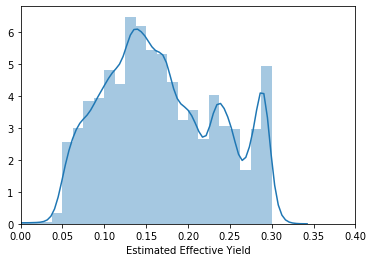

In [16]:
bins_Amount = np.arange(0, .3+.0125, .0125)
sb.distplot(df['EstimatedEffectiveYield'], bins= bins_Amount);
plt.xlim(0, .4)
plt.xlabel('Estimated Effective Yield');

#### Observations:
Yields are left skewed like the loan amount; I'll try to investigate the relation between them later in the bivariate section. We can see the estimated yeild located at the area between 0 and .35 with mean .16

### now we will take a look on the borrowers' criteria :

### 6. Employment Status:

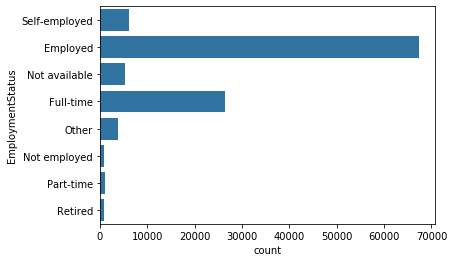

In [17]:
sb.countplot(y=df['EmploymentStatus'], color=base_color);

maybe there are interferance between categories because the Full-timers, Part-timers and Self-employed are already part of Employed category so the employed exeeds this count (67k) showed in the plot, but we can see the full-timers are the largest category between employed borrowers unless we have got another distribution of the Employed category.

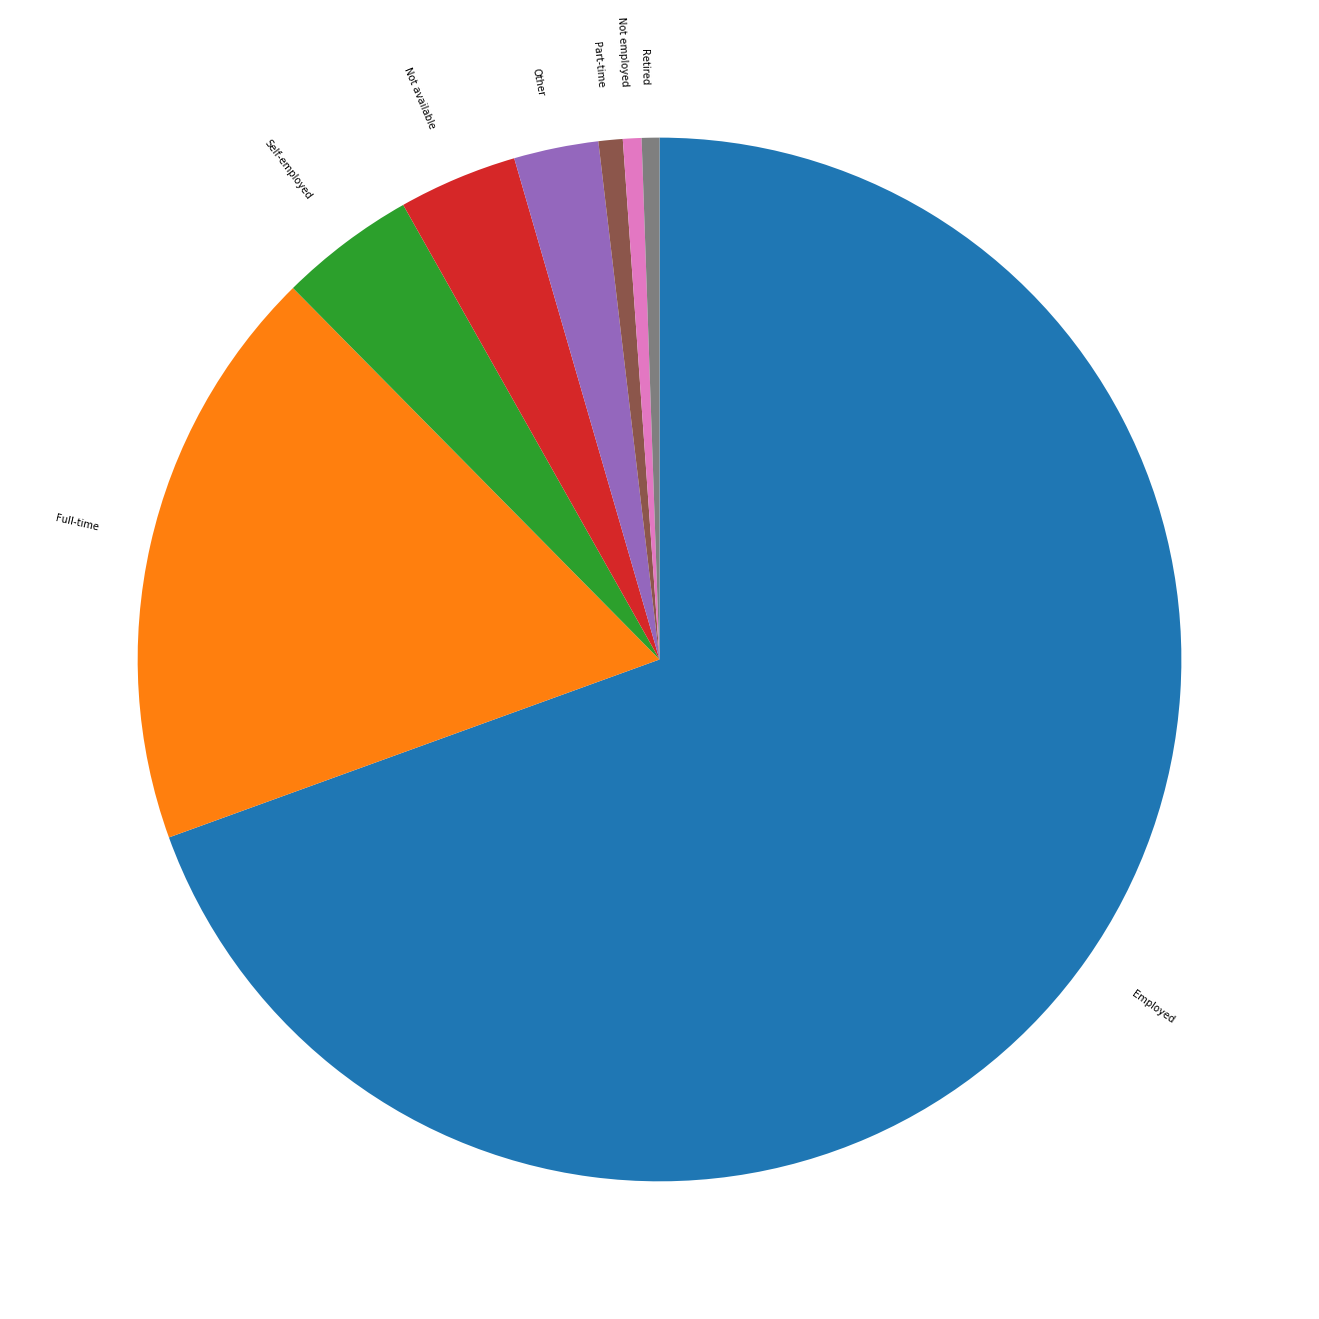

In [18]:
count_employment = df['EmploymentStatus'].value_counts()
count_employment['Employed'] = count_employment['Employed'] + count_employment['Self-employed'] + count_employment['Full-time'] + count_employment['Part-time']
fig = plt.figure(figsize= (48,24))
plt.pie(count_employment, labels=count_employment.index, startangle=90, counterclock=False, rotatelabels=True);

Now it's more obvious the dominance of Employed category

### 7. Listing Category:

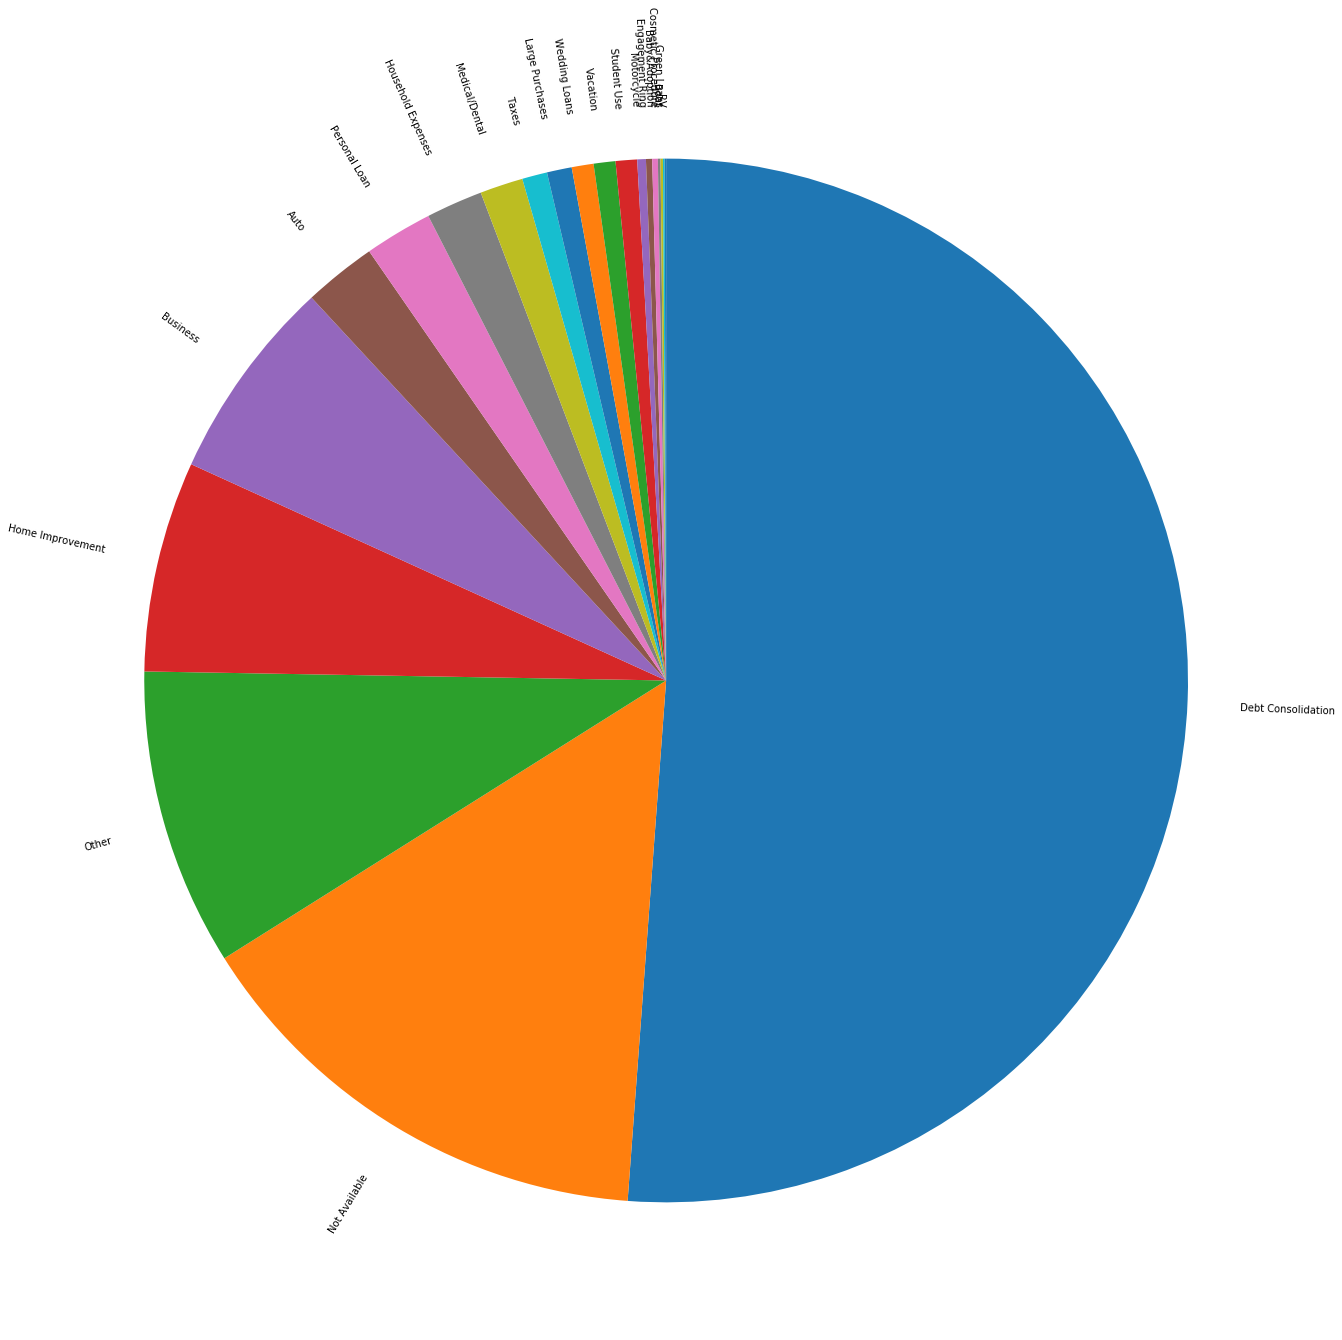

In [19]:
df['ListingCategory (categorical)']= df['ListingCategory (numeric)'].replace({0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'})
cat = df['ListingCategory (categorical)'].value_counts()
fig = plt.figure(figsize= (48,24))
plt.pie(cat, labels=cat.index, startangle=90, counterclock=False, rotatelabels=True);

Debt consolidation refers to the act of taking out a new loan to pay off other liabilities and consumer debts so it makes sense to be the largest category because any other category could be converted into Debt consolidation. By looking to the other categories we can see that the business and home improvement take a considerable large amount of loans in our dataset.

### 8. Prosper Score:

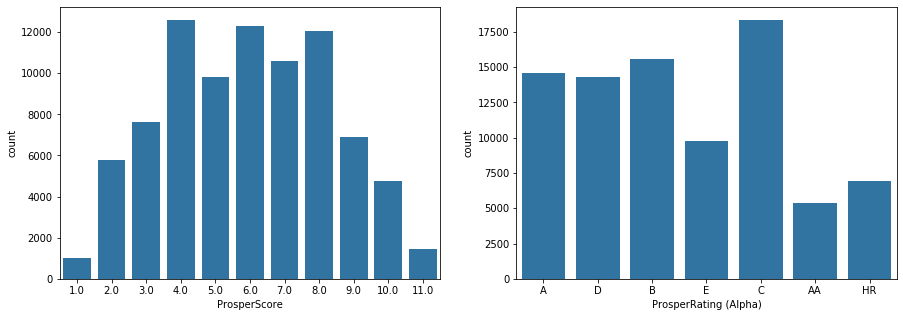

In [20]:
fig, ax= plt.subplots(1,2,figsize=(15,5))
sb.countplot(df['ProsperScore'], color= base_color, ax=ax[0]);
sb.countplot(df['ProsperRating (Alpha)'], color= base_color, ax=ax[1]);

### 9. Income Range:

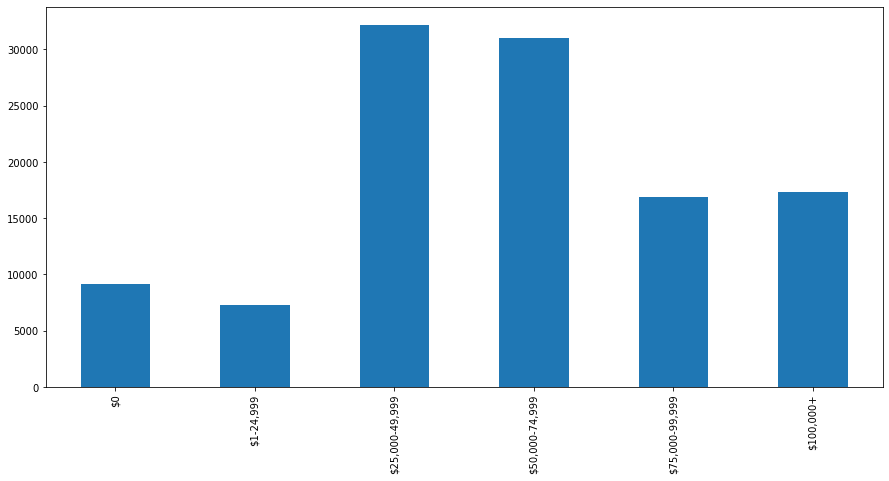

In [21]:
df['IncomeRange'] = df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0')
fig = plt.figure(figsize=(15,7))
df.IncomeRange.value_counts().loc[["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999",
                                   "$75,000-99,999", "$100,000+"]].plot.bar();



Most frequent income range is (25,000-75,000$) 
 

### 10. Debt To Income Ratio:

In [22]:
df['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

(0, 0.75)

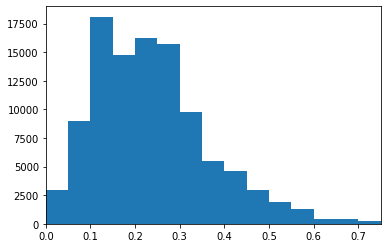

In [23]:
plt.hist(df['DebtToIncomeRatio'], bins=np.arange(0,2,.05));
plt.xlim(0, .75)

Skewed to left distributed with mean 2.5
 

C:\Users\WinDows10\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\WinDows10\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


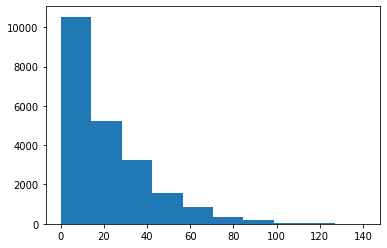

In [24]:
plt.hist(df['OnTimeProsperPayments']);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Brrower's APR is skewed to left with mean .2
- Original loan amount is skewed to left with spikes in 15,20,25k 
- Estimated effective yield range between 0 and .35 with mean .35 and also skewed to left
- income range frequent between 25k and 75k



## Bivariate Exploration


We will focus in this part on pairs of variable which I've primary thoughts about their effect on each others.

### 1. Investigaying factors may affect Borrower's APR and Interest rate:

#### 1.1. Prosper score

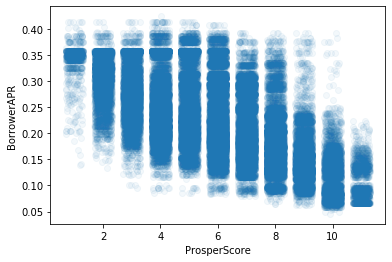

In [25]:
sb.regplot(x=df['ProsperScore'], y=df['BorrowerAPR'], truncate=False, x_jitter=.3,
           scatter_kws={'alpha':1/20}, fit_reg=False);

Increasing ProsperScore correlated with decreasing Brrower APR; low risk (heigh score) give the lender some confidance reflects on the value of APR, maybe they aim to encourage more borrowers have heigh scores by this low APRs. 

#### 1.3. Income Range

In [26]:
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', '$0', '$100,000+',
       '$75,000-99,999', '$1-24,999'], dtype=object)

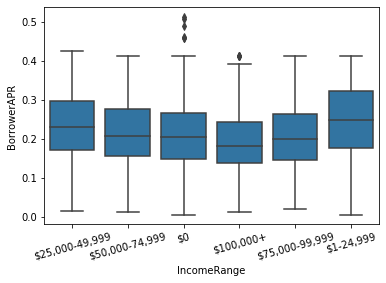

In [27]:

sb.boxplot(x= df['IncomeRange'], y=df['BorrowerAPR'], color=base_color);
plt.xticks(rotation=15);

No significant difference shown in APR between different income ranges

#### 1.4. Debt To Income Ratio:

(0, 2)

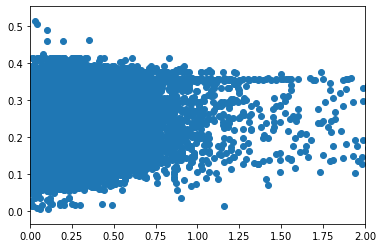

In [28]:
plt.scatter(df['DebtToIncomeRatio'], df['BorrowerAPR'])
plt.xlim(0,2)

No relation appeared

#### 1.5 Term: the length of loan

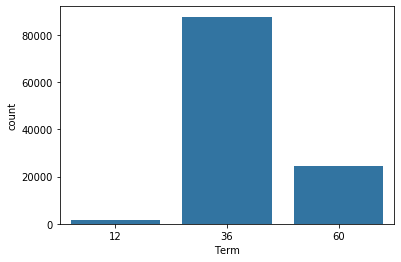

In [29]:
df['Term'].unique()
sb.countplot(df['Term'],color=base_color)

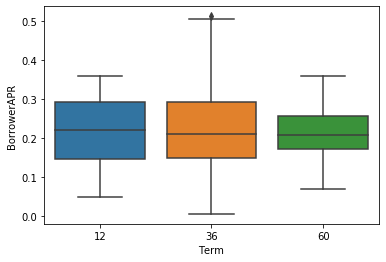

In [30]:
sb.boxplot(x=df['Term'], y=df['BorrowerAPR'])

No relationship observed between them

#### 1.6. Recomendations:

(0, 3)

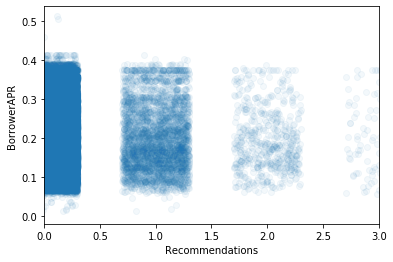

In [31]:
df['Recommendations'].unique()
sb.regplot(df['Recommendations'], df['BorrowerAPR'], truncate=False, x_jitter=.3,
           scatter_kws={'alpha':1/20}, fit_reg=False);
plt.xlim(0,3)

It shows that the the most brrowers have no or low recomendation but no obvious relationship between recomendations and APR

In [32]:
df['Recommendations'].value_counts()

0     109678
1       3516
2        568
3        108
4         26
5         14
9          6
7          5
6          4
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: Recommendations, dtype: int64

### 2. Investigating factors affecting Loan's outcome:

#### 2.1. Prosper Score

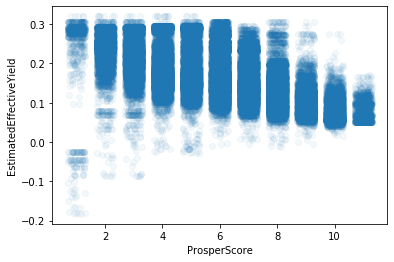

In [33]:
sb.regplot(df['ProsperScore'], df['EstimatedEffectiveYield'], truncate=False, x_jitter=.3,
           scatter_kws={'alpha':1/20}, fit_reg=False);


Estimated yield decreased obviously in the low risk scores 

#### 2.2. Income range:

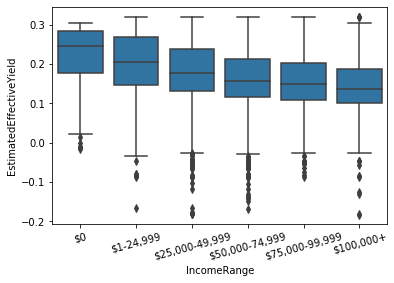

In [34]:
sb.boxplot(x= df['IncomeRange'], y=df['EstimatedEffectiveYield'], color=base_color, order= ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]);
plt.xticks(rotation=15);

Estimated yield getting lower with heigher income borrowers !

#### 2.3. On the time prosper payment:

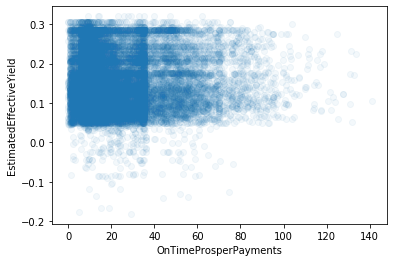

In [35]:

sb.regplot(x= df['OnTimeProsperPayments'], y=df['EstimatedEffectiveYield'], truncate=False, x_jitter=.3,
           scatter_kws={'alpha':1/20}, fit_reg=False);


No relationshihps, although most borrowers pay on time it didn't make any difference in Estimated yield

#### 2.4. Term or the loan length:

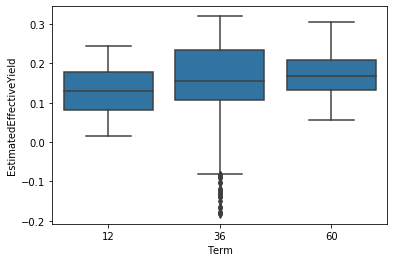

In [36]:
sb.boxplot(x= df['Term'], y=df['EstimatedEffectiveYield'], color=base_color);

sixty monhts show heigher mean of yeild than twelve months loan lenght it may mean that they should invest more in longer terms loans

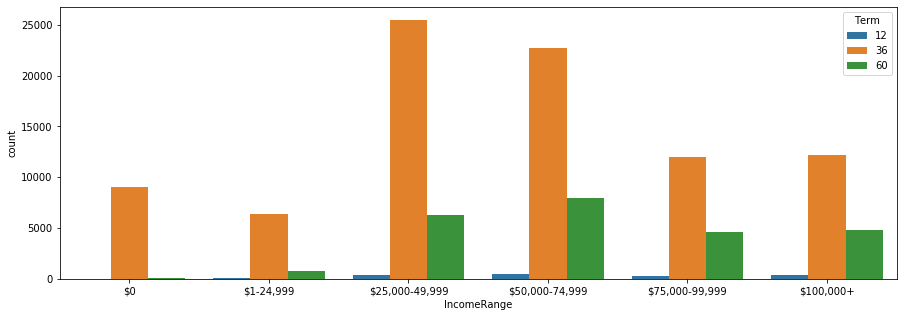

In [37]:
fig = plt.figure(figsize=(15,5))
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', order= ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]);


Estimated yield increased in the long terms 

### 3. Effect of loan original amount:

#### 3.1. Estimated effective yield:

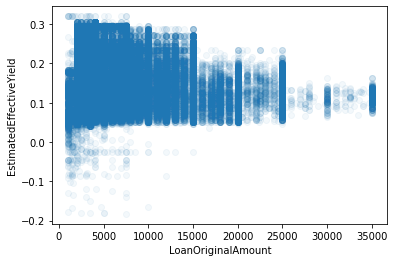

In [38]:
sb.regplot(df['LoanOriginalAmount'], df['EstimatedEffectiveYield'], truncate=False, x_jitter=.3,
           scatter_kws={'alpha':1/20}, fit_reg=False);

Surprisingly low amounts estimated to give heigher yield!

#### effect of income range on loan amount

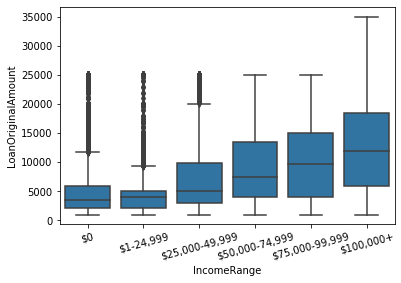

In [39]:
sb.boxplot(x= df['IncomeRange'], y=df['LoanOriginalAmount'], color=base_color, order= ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]);
plt.xticks(rotation=15);

people have high income borrow the large amount loans

#### 3.2. Prosper score:

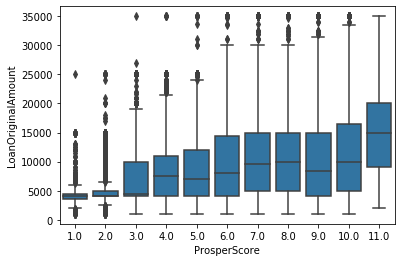

In [40]:
sb.boxplot(df['ProsperScore'], df['LoanOriginalAmount'], color=base_color);

Heigher loan's amount correlated with heigh scores or low risk

#### APRs of the high amount  loans

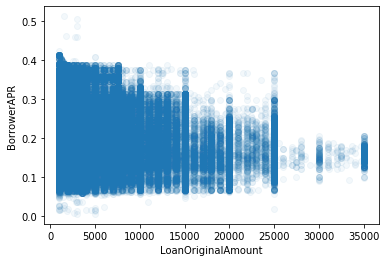

In [48]:
sb.regplot(df['LoanOriginalAmount'], df['BorrowerAPR'], truncate=False, x_jitter=.3,
           scatter_kws={'alpha':1/20}, fit_reg=False);

high amount loans pay the lowest APRs

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> ##### Borrwer's APR:
decreased with heigh scores (lower risk), and no difference with income range, term and surprisingly recomendations.
> ##### Loan's outcome:
low risk means low estimated yield. Borrowers with heigh incomes estimated to make lower effective yields!!
Paying ontime has no effect on yield but loan's length expected to make heigher yield !
> ##### Effect of loans original amount:
- estimated effective yield: heiger yield expected from low amount loans
- prosper scores: heigh amount loans are correlated with low risk 



## Multivariate Exploration



#### Heatmap between all variabls of interests

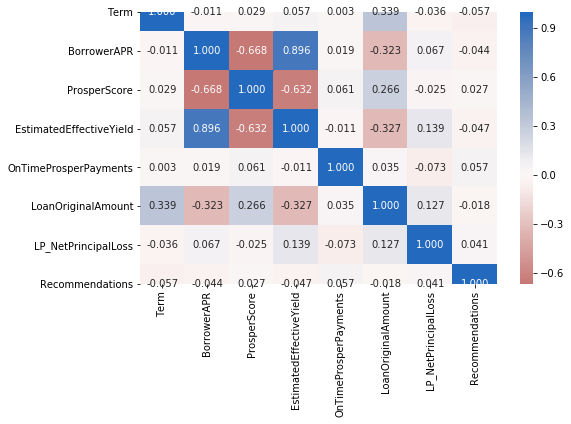

In [41]:
heatable_cols= ['Term', 'BorrowerAPR', 'ProsperScore', 'EstimatedEffectiveYield',
                'IncomeRange', 'OnTimeProsperPayments', 'LoanOriginalAmount', 'LP_NetPrincipalLoss',
                'Recommendations' ]
plt.figure(figsize = [8, 5])
sb.heatmap(df[heatable_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

This heatmap summerized relations we investigated in the previous part

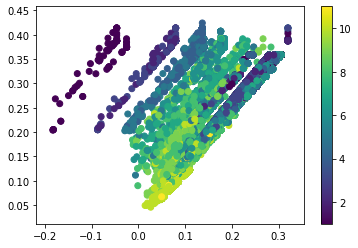

In [42]:
plt.scatter(data = df, x = 'EstimatedEffectiveYield', y = 'BorrowerAPR', c = 'ProsperScore')
plt.colorbar()

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
!jupyter nbconvert exploration_template.ipynb --to slides --post serve --no-input --no-prompt